In [104]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors 
%matplotlib inline 

In [105]:
dirn="c:/jhigh/Projects/"
fn="transects_greatmarsh_rtk_edited2.csv"
print(dirn + fn)
fullpathn = dirn + fn

c:/jhigh/Projects/transects_greatmarsh_rtk_edited2.csv


In [106]:
df=pd.read_csv(fn, header = 0, skiprows=0, delimiter=',')
print("Read: ",len(df.index),' lines.')

Read:  235  lines.


In [107]:
df['Elevation Difference'] = df['interp_Z'] - df['Local_Z'] 

In [108]:
df.describe()

,Point ID,Local_N,Local_E,Local_Z,interp_Z,Elevation Difference
count,235.000000,2.350000e+02,235.000000,235.000000,235.000000,235.000000
mean,126.051064,4.621207e+06,386110.943208,4.331120,4.410966,0.079846
std,70.292228,2.601504e+02,148.778683,3.243622,3.237115,0.054261
min,5.000000,4.620627e+06,385862.809500,-0.900000,-0.927630,-0.077930
25%,66.000000,4.621087e+06,385986.562550,1.698000,1.830970,0.046800
50%,126.000000,4.621231e+06,386108.424400,2.969000,3.018600,0.067300
75%,185.500000,4.621393e+06,386195.934950,6.332700,6.407500,0.101050
max,248.000000,4.621627e+06,386414.320800,15.370000,15.364600,0.327100


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6BF501320>]],
      dtype=object)

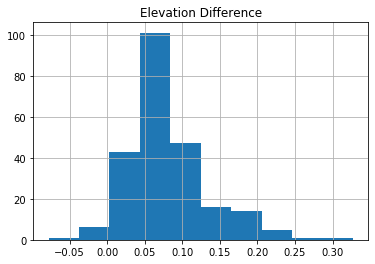

In [109]:
df.hist(column ="Elevation Difference")

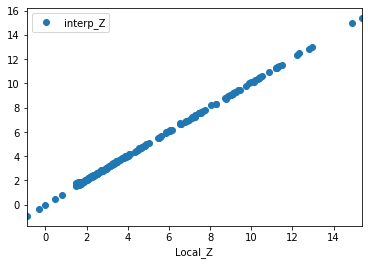

In [110]:
df.plot(x='Local_Z', y='interp_Z', style="o")

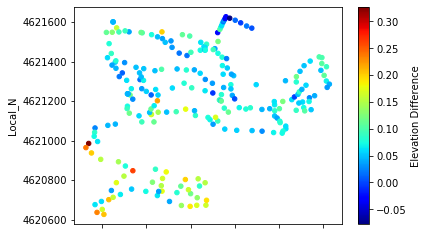

In [111]:
df.plot(kind='scatter', x='Local_E', y='Local_N', c="Elevation Difference", cmap= "jet")

In [112]:
dirn="c:/jhigh/Projects/"
fn2="transects_greatmarsh_rtk_edited2_with_Classification.csv"
print(dirn + fn2)
fullpathn2 = dirn + fn2

c:/jhigh/Projects/transects_greatmarsh_rtk_edited2_with_Classification.csv


In [113]:
df2= pd.read_csv(fullpathn2, header=0, skiprows=0, delimiter=",")
print("Read: ", len(df2.index), "lines.")

Read:  235 lines.


In [114]:
df2["Classification"]

0      6
1      6
2      6
3      5
4      5
5      5
6      5
7      5
8      5
9      5
10     5
11     5
12     5
13     5
14     3
15     5
16     5
17     5
18     5
19     5
20     5
21     3
22     5
23     5
24     5
25     5
26     5
27     5
28     5
29     5
      ..
205    4
206    5
207    4
208    4
209    5
210    5
211    5
212    5
213    5
214    5
215    5
216    5
217    5
218    5
219    5
220    5
221    5
222    6
223    6
224    6
225    6
226    6
227    7
228    7
229    8
230    8
231    7
232    6
233    6
234    6
Name: Classification, Length: 235, dtype: int64

In [115]:
df2['Elevation Difference'] = df['interp_Z'] - df['Local_Z'] 

In [116]:
x = df2["Elevation Difference"].values

In [117]:
y = df2["Local_Z"].values

In [118]:
z = df2["Classification"].values

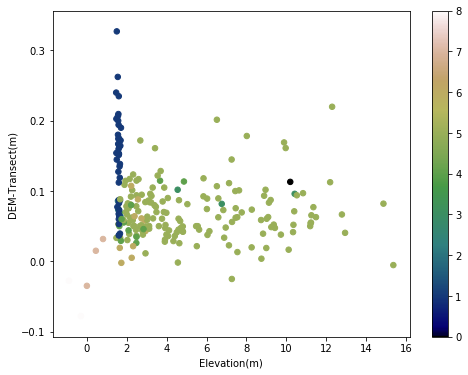

In [119]:
#TODO bigger dots,better colormap, and change color bar into a discrete (blocks) color bar instead of continuous (google around)
plt.figure(figsize=(8,6))
plt.scatter(y, x, 30, z, cmap="gist_earth")
plt.colorbar()
plt.xlabel("Elevation(m)")
plt.ylabel("DEM-Transect(m)")
plt.savefig("DEM-Transect_vs_Elev_Scatter_Plot.png")

In [120]:
df2["Elevation Difference"].loc[df2["Classification"]==1].mean()

0.14327186046511625

In [121]:
df2["Elevation Difference"].loc[df2["Classification"]==1].describe()

count    43.000000
mean      0.143272
std       0.065538
min       0.036900
25%       0.084615
50%       0.153540
75%       0.177645
max       0.327100
Name: Elevation Difference, dtype: float64

In [122]:
classes = {0:"Target",
           1:"Salt Marsh Grass",
           2:"Dirt or Vegetated Road",
           3:"Dark Dune Vegetation",
           4:"Sand(sandy road)",
           5:"Sand(dunes)",
           6:"Sand(beach)",
           7:"Wet Sand",
           8:"Submerged Sand",
          }
classes

{0: 'Target',
 1: 'Salt Marsh Grass',
 2: 'Dirt or Vegetated Road',
 3: 'Dark Dune Vegetation',
 4: 'Sand(sandy road)',
 5: 'Sand(dunes)',
 6: 'Sand(beach)',
 7: 'Wet Sand',
 8: 'Submerged Sand'}

0 Target
count    1.00000
mean     0.11299
std          NaN
min      0.11299
25%      0.11299
50%      0.11299
75%      0.11299
max      0.11299
Name: Elevation Difference, dtype: float64
rmse= 0.11298999999999992
1 Salt Marsh Grass
count    43.000000
mean      0.143272
std       0.065538
min       0.036900
25%       0.084615
50%       0.153540
75%       0.177645
max       0.327100
Name: Elevation Difference, dtype: float64
rmse= 0.1572329382691304
2 Dirt or Vegetated Road
count    3.000000
mean     0.074463
std      0.010925
min      0.064190
25%      0.068725
50%      0.073260
75%      0.079600
max      0.085940
Name: Elevation Difference, dtype: float64
rmse= 0.07499570498813032
3 Dark Dune Vegetation
count    3.000000
mean     0.093167
std      0.010345
min      0.081700
25%      0.088850
50%      0.096000
75%      0.098900
max      0.101800
Name: Elevation Difference, dtype: float64
rmse= 0.09354879297279473
4 Sand(sandy road)
count    14.000000
mean      0.060861
std       0.0275

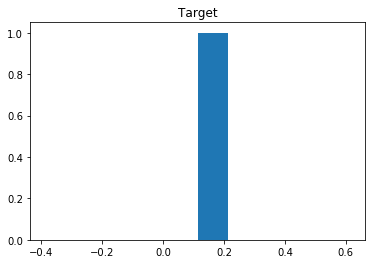

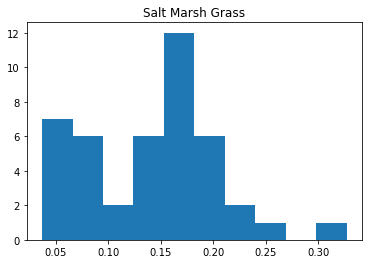

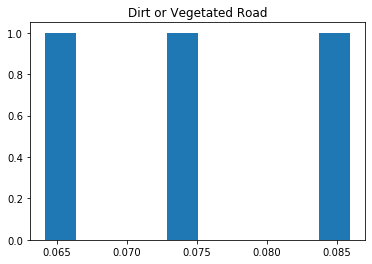

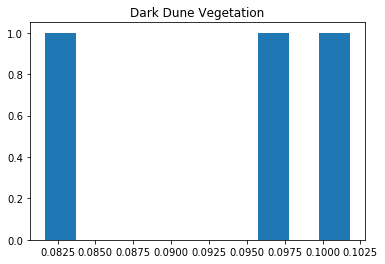

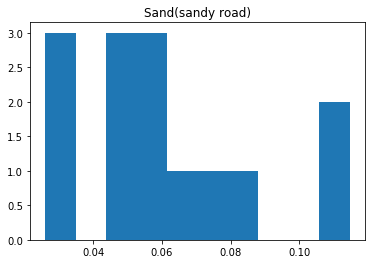

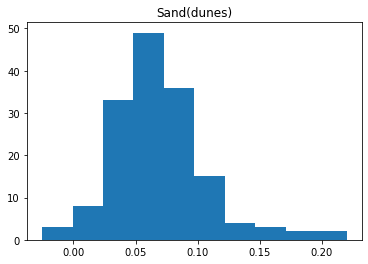

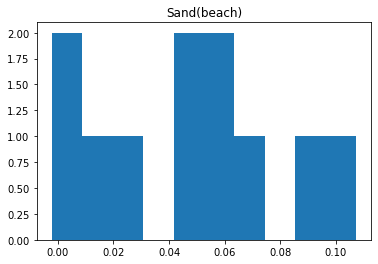

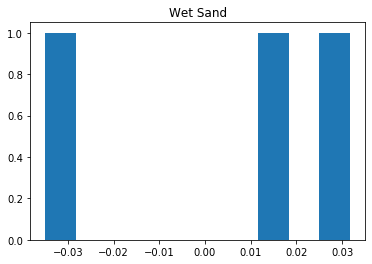

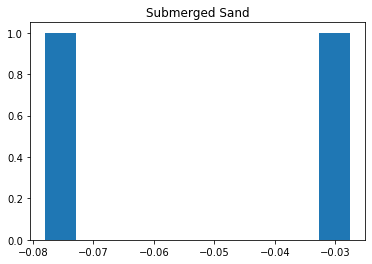

In [123]:
for i in range(0,9):
    print(i, classes[i])
    print(df2["Elevation Difference"].loc[df2["Classification"]==i].describe())
    val = df2["Elevation Difference"].loc[df2["Classification"]==i].values
    rmse=np.sqrt(np.mean(val**2))
    print("rmse=",rmse)
    plt.figure(figsize= (6,4))
    plt.hist(val)
    plt.title(classes[i])

In [124]:
pwd

'C:\\jhigh\\Source\\Learning_Python_in_Great_Marshes_Region'

In [125]:
dirn="c:/jhigh/Projects/"
fn3="transects_greatmarsh_rtk_edited3.csv"
print(dirn + fn3)
fullpathn3 = dirn + fn3

c:/jhigh/Projects/transects_greatmarsh_rtk_edited3.csv


In [126]:
df3 = pd.read_csv(fullpathn3, header=0, skiprows=0, delimiter=",")
print("Read: ", len(df3.index), "lines.")
df3

Read:  235 lines.


,Point ID,Local_N,Local_E,Local_Z,1mgrid_Z,BareEarth_Z,Classification
0,5,4621601.180,385924.0487,2.8989,2.95700,2.954,6
1,6,4621600.720,385924.4364,2.9419,2.98500,2.985,6
2,7,4621600.740,385924.4032,2.9379,2.98300,2.983,6
3,8,4621570.795,385932.4255,3.4181,3.57900,3.577,5
4,9,4621550.622,385960.5784,2.1262,2.16500,2.164,5
5,10,4621545.638,385990.3527,2.2740,2.37520,2.375,5
6,11,4621536.262,386011.5767,1.9830,2.06120,2.061,5
7,12,4621525.232,386025.0516,3.9320,3.97920,3.965,5
8,13,4621516.255,386036.1507,2.4860,2.52230,2.522,5
9,14,4621504.708,386055.4914,1.4830,1.51630,1.514,5


In [127]:
df3['Elevation Difference'] = df3['BareEarth_Z'] - df3['Local_Z'] 

In [128]:
df3.describe()

,Point ID,Local_N,Local_E,Local_Z,1mgrid_Z,BareEarth_Z,Classification,Elevation Difference
count,235.000000,2.350000e+02,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,126.051064,4.621207e+06,386110.943208,4.331120,4.410966,4.401272,4.221277,0.070153
std,70.292228,2.601504e+02,148.778683,3.243622,3.237115,3.233730,1.685146,0.059491
min,5.000000,4.620627e+06,385862.809500,-0.900000,-0.927630,-0.929000,0.000000,-0.296000
25%,66.000000,4.621087e+06,385986.562550,1.698000,1.830970,1.828000,4.000000,0.037900
50%,126.000000,4.621231e+06,386108.424400,2.969000,3.018600,3.018000,5.000000,0.059000
75%,185.500000,4.621393e+06,386195.934950,6.332700,6.407500,6.403000,5.000000,0.092000
max,248.000000,4.621627e+06,386414.320800,15.370000,15.364600,15.348000,8.000000,0.325000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6BE8B2390>]],
      dtype=object)

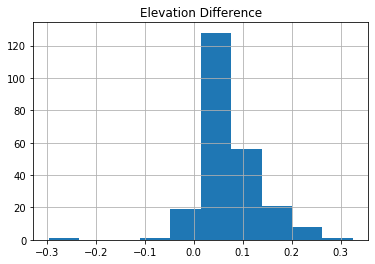

In [129]:
df3.hist(column="Elevation Difference")

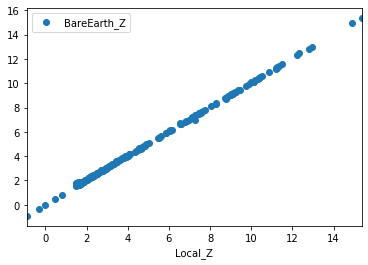

In [130]:
df3.plot(x='Local_Z', y='BareEarth_Z', style="o")

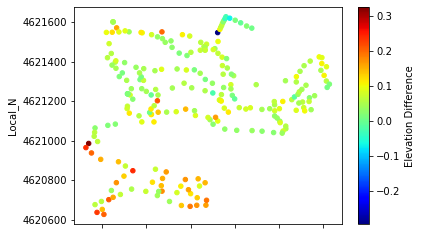

In [131]:
df3.plot(kind='scatter', x='Local_E', y='Local_N', c="Elevation Difference", cmap= "jet")

In [132]:
y = df3["Elevation Difference"].values

In [133]:
x =df3["Local_Z"].values

In [134]:
z=df3["Classification"].values 

In [135]:
ticks = np.arange(0.5, 9.5, 1)
ticks

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5])

In [136]:
tlabels = ["Target",
           "Salt Marsh Grass",
           "Dirt or Vegetated Road",
           "Dark Dune Vegetation",
           "Sand(sandy road)",
           "Sand(dunes)",
           "Sand(beach)",
           "Wet Sand",
           "Submerged Sand",
          ]
tlabels

['Target',
 'Salt Marsh Grass',
 'Dirt or Vegetated Road',
 'Dark Dune Vegetation',
 'Sand(sandy road)',
 'Sand(dunes)',
 'Sand(beach)',
 'Wet Sand',
 'Submerged Sand']

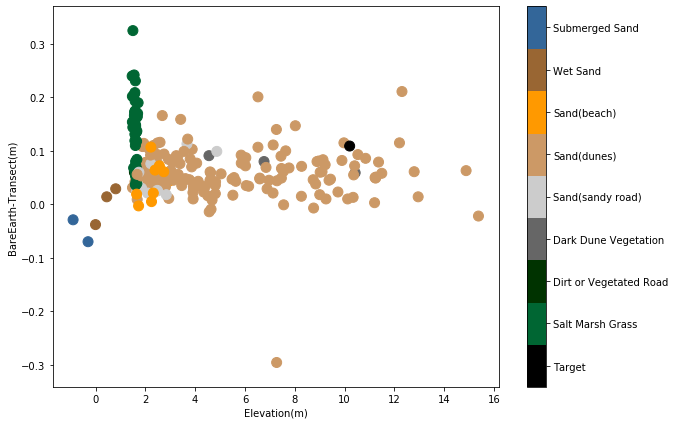

In [137]:
plt.figure(figsize=(10,7))
cmap = colors.ListedColormap(['black','#006633', '#003300', '#666666','#CCCCCC','#CC9966', '#FF9900', '#996633', '#336699',])
boundaries= np.arange(0, 10, 1)
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
plt.scatter(x, y, s= 100, c= z, cmap=cmap, norm=norm)
cbar = plt.colorbar(ticks= ticks)
cbar.ax.set_yticklabels(tlabels)
plt.xlabel("Elevation(m)")
plt.ylabel("BareEarth-Transect(m)")
plt.savefig("BareEarth-Transect_vs_Elev_Scatter_Plot.png")

In [138]:
df3.describe()

,Point ID,Local_N,Local_E,Local_Z,1mgrid_Z,BareEarth_Z,Classification,Elevation Difference
count,235.000000,2.350000e+02,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,126.051064,4.621207e+06,386110.943208,4.331120,4.410966,4.401272,4.221277,0.070153
std,70.292228,2.601504e+02,148.778683,3.243622,3.237115,3.233730,1.685146,0.059491
min,5.000000,4.620627e+06,385862.809500,-0.900000,-0.927630,-0.929000,0.000000,-0.296000
25%,66.000000,4.621087e+06,385986.562550,1.698000,1.830970,1.828000,4.000000,0.037900
50%,126.000000,4.621231e+06,386108.424400,2.969000,3.018600,3.018000,5.000000,0.059000
75%,185.500000,4.621393e+06,386195.934950,6.332700,6.407500,6.403000,5.000000,0.092000
max,248.000000,4.621627e+06,386414.320800,15.370000,15.364600,15.348000,8.000000,0.325000


In [142]:
classes = {0:"Target",
           1:"Salt Marsh Grass",
           2:"Dirt or Vegetated Road",
           3:"Dark Dune Vegetation",
           4:"Sand(sandy road)",
           5:"Sand(dunes)",
           6:"Sand(beach)",
           7:"Wet Sand",
           8:"Submerged Sand",
          }
classes

{0: 'Target',
 1: 'Salt Marsh Grass',
 2: 'Dirt or Vegetated Road',
 3: 'Dark Dune Vegetation',
 4: 'Sand(sandy road)',
 5: 'Sand(dunes)',
 6: 'Sand(beach)',
 7: 'Wet Sand',
 8: 'Submerged Sand'}

In [140]:
binedges= np.arange(-.4,.45, .05)
binedges

array([-4.00000000e-01, -3.50000000e-01, -3.00000000e-01, -2.50000000e-01,
       -2.00000000e-01, -1.50000000e-01, -1.00000000e-01, -5.00000000e-02,
       -1.11022302e-16,  5.00000000e-02,  1.00000000e-01,  1.50000000e-01,
        2.00000000e-01,  2.50000000e-01,  3.00000000e-01,  3.50000000e-01,
        4.00000000e-01])

0 Target
count    1.000
mean     0.109
std        NaN
min      0.109
25%      0.109
50%      0.109
75%      0.109
max      0.109
Name: Elevation Difference, dtype: float64
rmse= 0.10900000000000176
1 Salt Marsh Grass
count    43.000000
mean      0.138140
std       0.065118
min       0.036000
25%       0.076000
50%       0.145000
75%       0.173000
max       0.325000
Name: Elevation Difference, dtype: float64
rmse= 0.1523949886254122
2 Dirt or Vegetated Road
count    3.000000
mean     0.061333
std      0.002517
min      0.059000
25%      0.060000
50%      0.061000
75%      0.062500
max      0.064000
Name: Elevation Difference, dtype: float64
rmse= 0.06136774397026502
3 Dark Dune Vegetation
count    3.000000
mean     0.076667
std      0.016258
min      0.059000
25%      0.069500
50%      0.080000
75%      0.085500
max      0.091000
Name: Elevation Difference, dtype: float64
rmse= 0.077807454655708
4 Sand(sandy road)
count    14.000000
mean      0.044143
std       0.030742
min       0.018

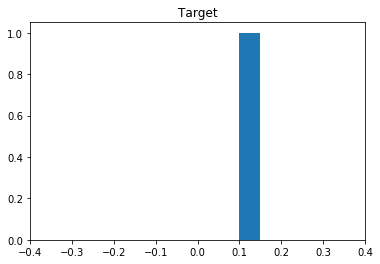

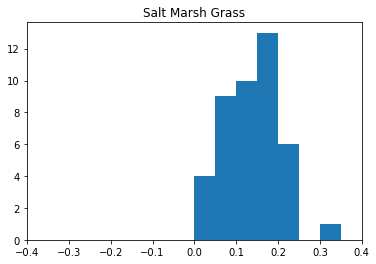

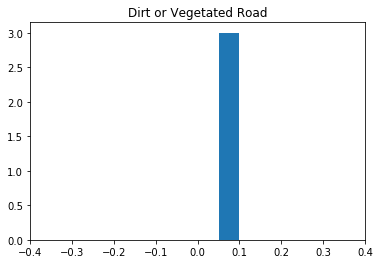

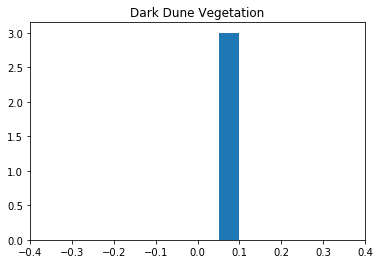

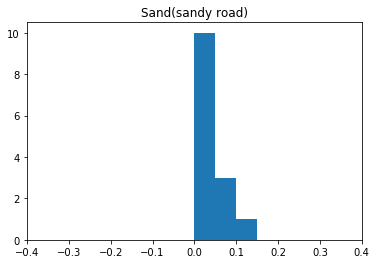

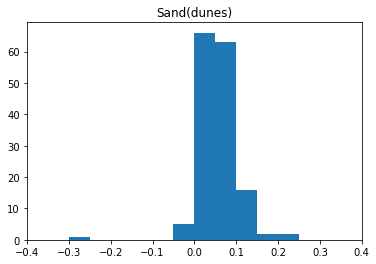

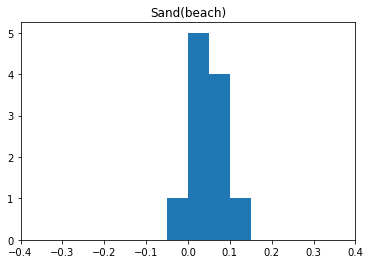

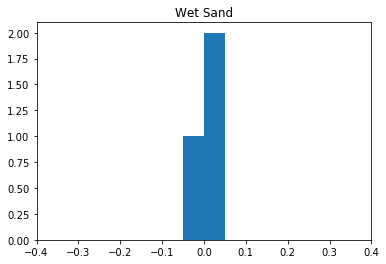

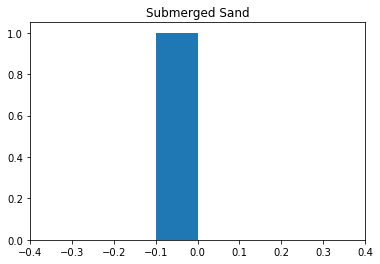

In [141]:
for i in range(0,9):
    print(i, classes[i])
    print(df3["Elevation Difference"].loc[df3["Classification"]==i].describe())
    val = df3["Elevation Difference"].loc[df3["Classification"]==i].values
    rmse=np.sqrt(np.mean(val**2))
    print("rmse=",rmse)
    pfn3 = "Hist{:01d}.png".format(i)
    plt.figure(figsize= (6,4))
    plt.hist(val, bins= binedges)
    plt.xlim((-.4,.4))
    plt.title(classes[i])
    plt.savefig(pfn3)